In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [15]:
def plot_columns(df, columns, ylim=None, logaxis=False, hline=True):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    if hline:
        plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_cls,D/loss_dom,D/loss_gp,D/loss_sd,D/loss_td,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom,G/loss_rot,G/loss_td
0,0:00:06,100,-0.7122,0.1793,1.3790,2.6907,0.0005,0.7018,0.6573,-0.2358,0.2760,1.4081,2.6987,0.2638,0.7502
1,0:00:09,200,-0.3919,0.1667,1.3033,2.6979,0.0036,0.6782,0.6832,-0.1748,0.1218,1.3916,2.7002,0.1247,0.7707
2,0:00:12,300,-0.3438,0.0393,1.1548,2.7033,0.0013,0.5415,0.7703,-0.0914,0.0895,1.2673,2.6974,0.1215,0.7981
3,0:00:16,400,-0.4472,0.2477,0.9359,2.7018,0.0083,0.6110,0.5668,-0.1956,0.0939,0.8128,2.7226,0.1316,0.6339
4,0:00:20,500,-0.5421,0.3099,0.7272,2.7106,0.0089,0.3962,0.6859,-0.3344,0.0942,0.6370,2.7022,0.1525,0.5692


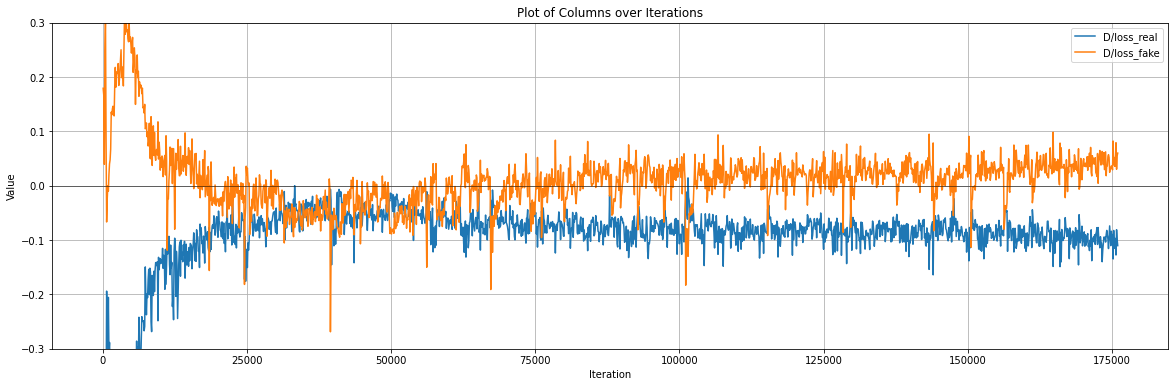

In [17]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

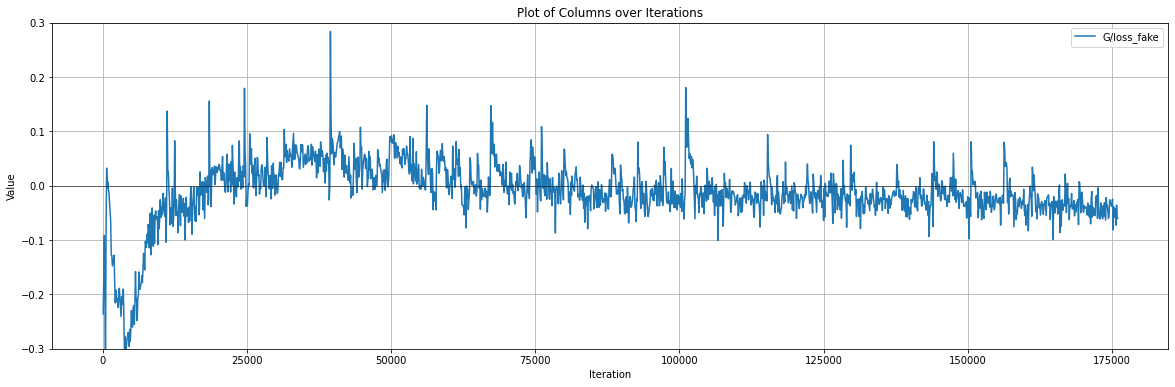

In [18]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

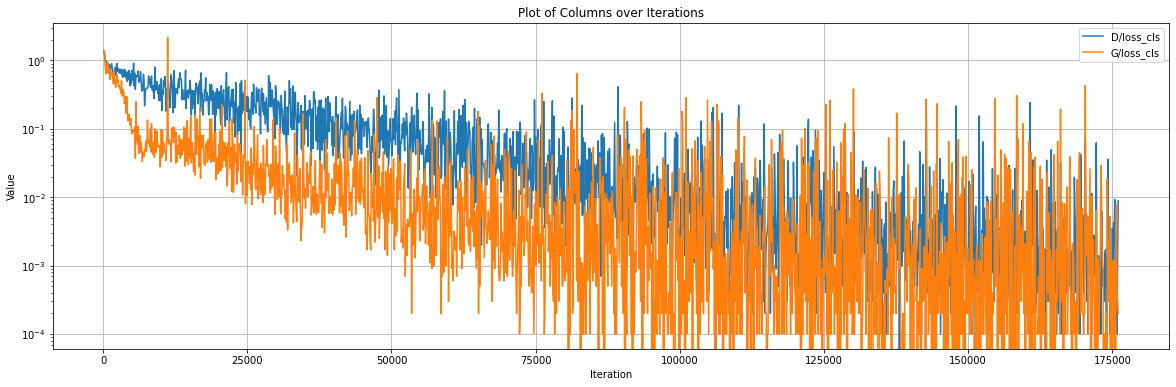

In [19]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

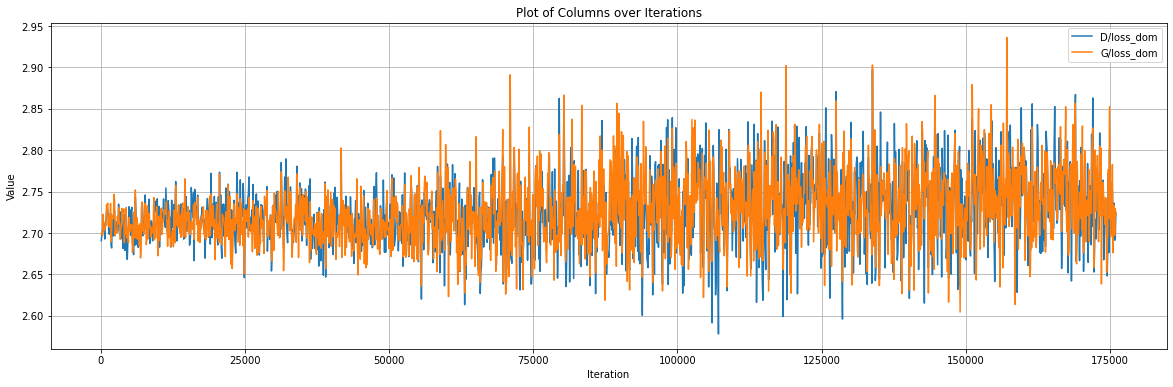

In [20]:
plot_columns(history, ['D/loss_dom', 'G/loss_dom'], logaxis=False, hline=False)

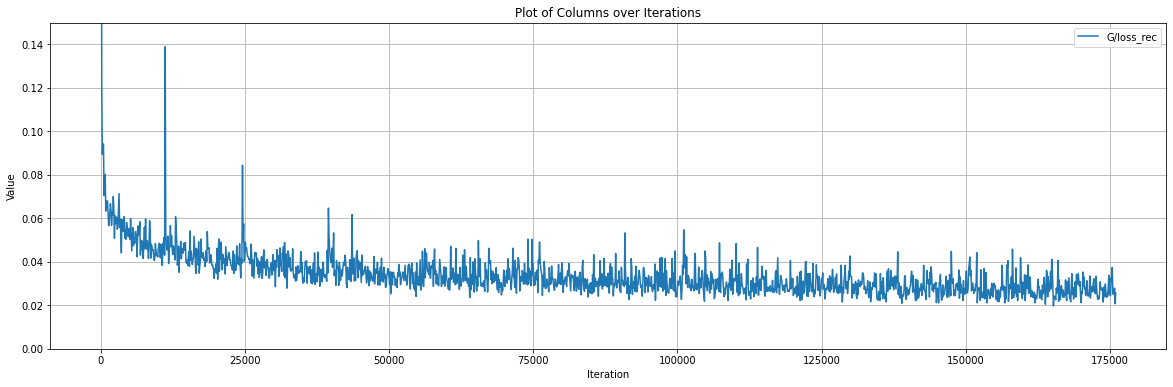

In [21]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.15))

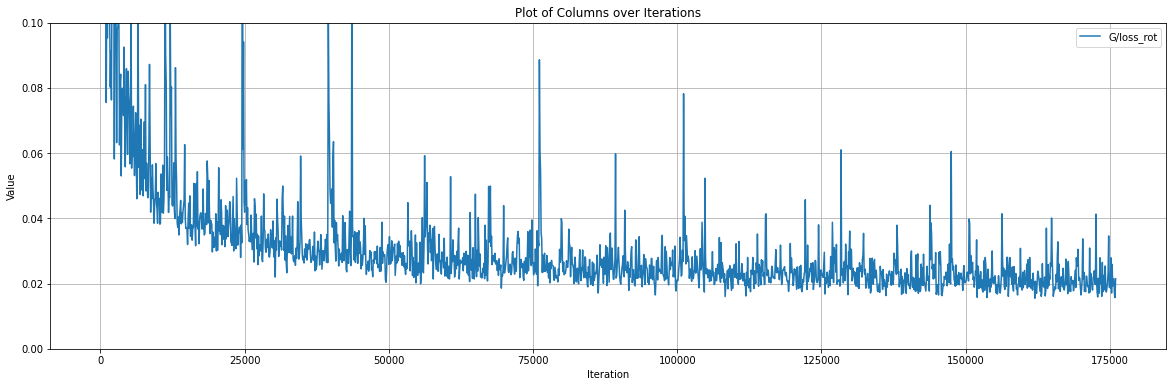

In [22]:
plot_columns(history, ['G/loss_rot'], logaxis=False, hline=False, ylim=(0, 0.1))

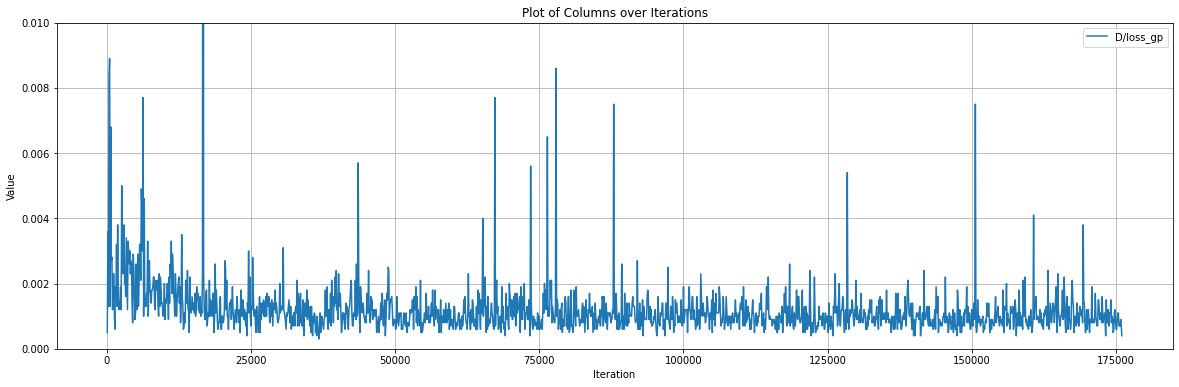

In [23]:
plot_columns(history, ['D/loss_gp'], logaxis=False, ylim=(0, 0.01))

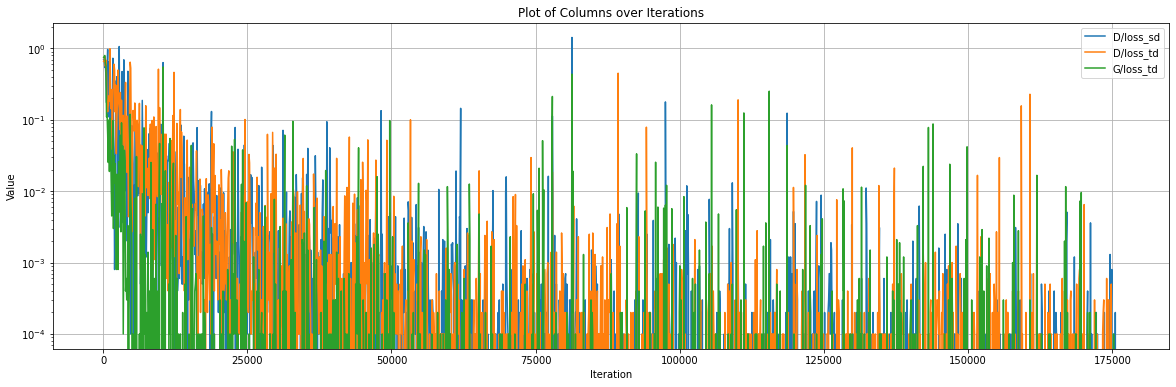

In [24]:
plot_columns(history, ['D/loss_sd', 'D/loss_td', 'G/loss_td'], logaxis=True, hline=False)

# Metrics

## TSTR Score

In [25]:
file_path = 'results/realworld_mobiact_TSTR.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,domain,loss,accuracy,f1
0,10000,15,3.263517,0.350,0.309524
1,10000,16,1.836648,0.625,0.580556
2,10000,17,1.355495,0.400,0.326389
3,10000,18,2.407915,0.500,0.432540
4,10000,19,1.313225,0.450,0.396058


Maximum average accuracy: 0.5481 at step 160000
Maximum average F1 score: 0.4734 at step 100000


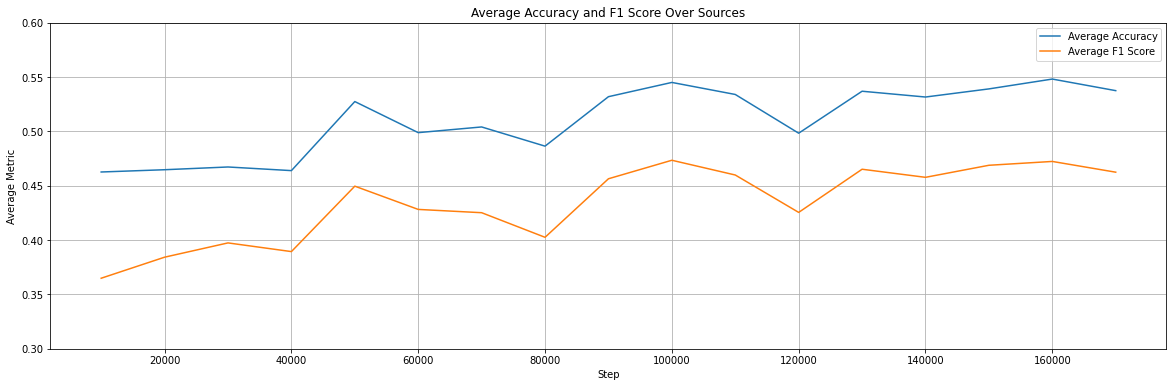

Minimum average loss: 2.3080 at step 90000


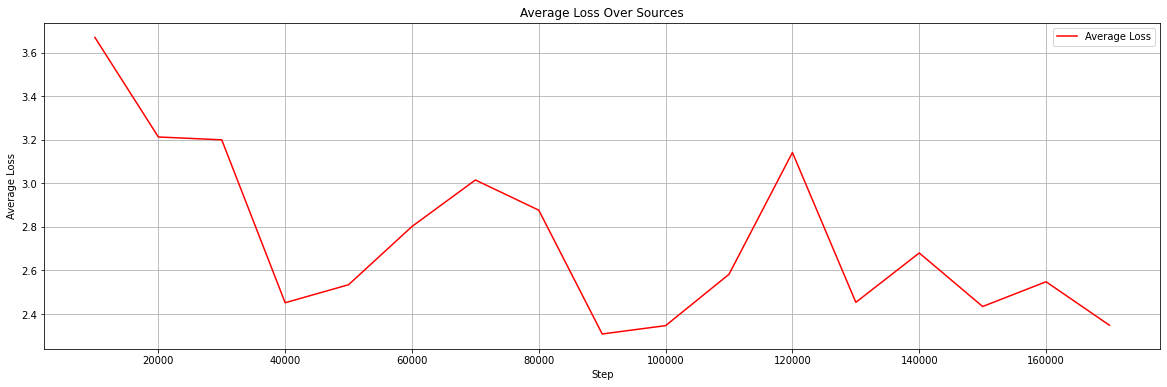

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(metrics, ylim=None):
    # Filter the DataFrame based on the metrics
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({'accuracy': 'mean', 'f1': 'mean', 'loss': 'mean'}).reset_index()

    # Plotting accuracy and F1 scores in the same plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['accuracy'], label='Average Accuracy')
    plt.plot(mean_data['step'], mean_data['f1'], label='Average F1 Score')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Find the maximum value of accuracy and F1 score and their corresponding steps
    max_accuracy = mean_data['accuracy'].max()
    max_accuracy_step = mean_data[mean_data['accuracy'] == max_accuracy]['step'].values[0]
    print(f'Maximum average accuracy: {max_accuracy:.4f} at step {max_accuracy_step}')
    
    max_f1 = mean_data['f1'].max()
    max_f1_step = mean_data[mean_data['f1'] == max_f1]['step'].values[0]
    print(f'Maximum average F1 score: {max_f1:.4f} at step {max_f1_step}')

    plt.title('Average Accuracy and F1 Score Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Metric')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting loss in a separate plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['loss'], label='Average Loss', color='red')
    
    # Find the minimum value of the loss and its corresponding step
    min_loss = mean_data['loss'].min()
    min_loss_step = mean_data[mean_data['loss'] == min_loss]['step'].values[0]
    print(f'Minimum average loss: {min_loss:.4f} at step {min_loss_step}')

    plt.title('Average Loss Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_metrics(classification_scores, ylim=(0.3, 0.6))